In [132]:
import requests
import json
#najpopularniejsze linie LOTU
limit = "1000"
token = "da5c2629c775519e514c874077aa7235"
call = requests.get(f"https://api.travelpayouts.com/v1/airline-directions?airline_code=LO&limit={limit}&token={token}")

dane = call.text


In [133]:
with open("popularnelot.json", "w+") as aa:
    zawartosc = json.loads(dane)
    json.dump(zawartosc, aa, indent=4)

In [134]:
import pandas
tabelka = pandas.read_json("popularnelot.json")
tabelka

,success,data
ADA-IST,True,150
ADB-IST,True,241
ADB-WAW,True,30
AES-OSL,True,119
AMM-IST,True,199
...,...,...
ZXA-LGW,True,6
ZXA-LHR,True,5
ZXE-LCY,True,35
ZXE-LGW,True,2235


In [135]:
popular = tabelka.sort_values(by="data", axis=0, ascending=False, inplace=False)

In [136]:
popular.head(20)

,success,data
IST-WAW,True,9854521
WAW-IST,True,8484442
WAW-KRK,True,6327352
KRK-WAW,True,5983945
BUD-WAW,True,5423791
WAW-BUD,True,5372611
WAW-CDG,True,5111393
WAW-FRA,True,5042563
WAW-VIE,True,5008974
WAW-LHR,True,4894009


In [137]:
popular.head()

,success,data
IST-WAW,True,9854521
WAW-IST,True,8484442
WAW-KRK,True,6327352
KRK-WAW,True,5983945
BUD-WAW,True,5423791


In [138]:
popular["loty"] = popular.index

In [139]:
popular.head()

,success,data,loty
IST-WAW,True,9854521,IST-WAW
WAW-IST,True,8484442,WAW-IST
WAW-KRK,True,6327352,WAW-KRK
KRK-WAW,True,5983945,KRK-WAW
BUD-WAW,True,5423791,BUD-WAW


In [140]:
popular[['skad', 'dokad']] = popular['loty'].str.split("-", expand=True)

In [141]:
popular

,success,data,loty,skad,dokad
IST-WAW,True,9854521,IST-WAW,IST,WAW
WAW-IST,True,8484442,WAW-IST,WAW,IST
WAW-KRK,True,6327352,WAW-KRK,WAW,KRK
KRK-WAW,True,5983945,KRK-WAW,KRK,WAW
BUD-WAW,True,5423791,BUD-WAW,BUD,WAW
...,...,...,...,...,...
FRA-ORD,True,1,FRA-ORD,FRA,ORD
FRA-LCY,True,1,FRA-LCY,FRA,LCY
FRA-IAD,True,1,FRA-IAD,FRA,IAD
FRA-EWR,True,1,FRA-EWR,FRA,EWR


In [142]:
nazwy = pandas.read_csv('wszystkielotniska.csv')
nazwy

,panstwa,kody_miast,miasta
0,TM,CRZ,Turkmenabat
1,AZ,GYD,Baku
2,CN,PEK,Beijing
3,GB,ZXE,Edinburgh
4,GB,LGW,London
...,...,...,...
3059,PH,USU,Busuanga
3060,JP,TSJ,Tsushima
3061,GR,PAS,Paros
3062,RU,OMS,Omsk


In [143]:
#renaming

In [144]:
nazwyskad = pandas.read_csv('wszystkielotniska.csv')

In [145]:
nazwyskad.rename(columns = {"panstwa":"skad_panstwa"}, inplace = True)

In [146]:
nazwyskad.rename(columns = {"miasta":"skad_miasta"}, inplace = True)

In [147]:
nazwydokad = pandas.read_csv('wszystkielotniska.csv')
nazwydokad.rename(columns = {"panstwa":"dokad_panstwa"}, inplace = True)
nazwydokad.rename(columns = {"miasta":"dokad_miasta"}, inplace = True)
nazwydokad

,dokad_panstwa,kody_miast,dokad_miasta
0,TM,CRZ,Turkmenabat
1,AZ,GYD,Baku
2,CN,PEK,Beijing
3,GB,ZXE,Edinburgh
4,GB,LGW,London
...,...,...,...
3059,PH,USU,Busuanga
3060,JP,TSJ,Tsushima
3061,GR,PAS,Paros
3062,RU,OMS,Omsk


In [148]:
nazwyskad

,skad_panstwa,kody_miast,skad_miasta
0,TM,CRZ,Turkmenabat
1,AZ,GYD,Baku
2,CN,PEK,Beijing
3,GB,ZXE,Edinburgh
4,GB,LGW,London
...,...,...,...
3059,PH,USU,Busuanga
3060,JP,TSJ,Tsushima
3061,GR,PAS,Paros
3062,RU,OMS,Omsk


In [149]:
popularv2 = popular.merge(nazwyskad, left_on="skad", right_on="kody_miast", how="left")


In [150]:
popularv2

,success,data,loty,skad,dokad,skad_panstwa,kody_miast,skad_miasta
0,True,9854521,IST-WAW,IST,WAW,TR,IST,Istanbul
1,True,8484442,WAW-IST,WAW,IST,PL,WAW,Warsaw
2,True,6327352,WAW-KRK,WAW,KRK,PL,WAW,Warsaw
3,True,5983945,KRK-WAW,KRK,WAW,PL,KRK,Krakow
4,True,5423791,BUD-WAW,BUD,WAW,HU,BUD,Budapest
...,...,...,...,...,...,...,...,...
483,True,1,FRA-ORD,FRA,ORD,DE,FRA,Frankfurt am Main
484,True,1,FRA-LCY,FRA,LCY,DE,FRA,Frankfurt am Main
485,True,1,FRA-IAD,FRA,IAD,DE,FRA,Frankfurt am Main
486,True,1,FRA-EWR,FRA,EWR,DE,FRA,Frankfurt am Main


In [151]:
popvfin = popularv2.merge(nazwydokad, left_on="dokad", right_on="kody_miast", how="left", suffixes=("_skad", "_dokad"))

In [152]:
popvfin.to_csv('najpopularniejsze.csv', mode='w', index=False, header=True)

In [153]:
popvfin

,success,data,loty,skad,dokad,skad_panstwa,kody_miast_skad,skad_miasta,dokad_panstwa,kody_miast_dokad,dokad_miasta
0,True,9854521,IST-WAW,IST,WAW,TR,IST,Istanbul,PL,WAW,Warsaw
1,True,8484442,WAW-IST,WAW,IST,PL,WAW,Warsaw,TR,IST,Istanbul
2,True,6327352,WAW-KRK,WAW,KRK,PL,WAW,Warsaw,PL,KRK,Krakow
3,True,5983945,KRK-WAW,KRK,WAW,PL,KRK,Krakow,PL,WAW,Warsaw
4,True,5423791,BUD-WAW,BUD,WAW,HU,BUD,Budapest,PL,WAW,Warsaw
...,...,...,...,...,...,...,...,...,...,...,...
483,True,1,FRA-ORD,FRA,ORD,DE,FRA,Frankfurt am Main,US,ORD,Chicago
484,True,1,FRA-LCY,FRA,LCY,DE,FRA,Frankfurt am Main,GB,LCY,London
485,True,1,FRA-IAD,FRA,IAD,DE,FRA,Frankfurt am Main,US,IAD,Washington
486,True,1,FRA-EWR,FRA,EWR,DE,FRA,Frankfurt am Main,US,EWR,Newark


In [154]:
#for i in popvfin['skad_miasta']:
    #popvfin['skad_miasta'].replace(i, str(i))
#for i in popvfin['dokad_miasta']:
    #popvfin['dokad_miasta'].replace(i, str(i))

#popvfin['lot_miasta'] = popvfin[['skad_miasta', 'dokad_miasta']].agg('-'.join, axis=1)


In [155]:
popvfin

,success,data,loty,skad,dokad,skad_panstwa,kody_miast_skad,skad_miasta,dokad_panstwa,kody_miast_dokad,dokad_miasta
0,True,9854521,IST-WAW,IST,WAW,TR,IST,Istanbul,PL,WAW,Warsaw
1,True,8484442,WAW-IST,WAW,IST,PL,WAW,Warsaw,TR,IST,Istanbul
2,True,6327352,WAW-KRK,WAW,KRK,PL,WAW,Warsaw,PL,KRK,Krakow
3,True,5983945,KRK-WAW,KRK,WAW,PL,KRK,Krakow,PL,WAW,Warsaw
4,True,5423791,BUD-WAW,BUD,WAW,HU,BUD,Budapest,PL,WAW,Warsaw
...,...,...,...,...,...,...,...,...,...,...,...
483,True,1,FRA-ORD,FRA,ORD,DE,FRA,Frankfurt am Main,US,ORD,Chicago
484,True,1,FRA-LCY,FRA,LCY,DE,FRA,Frankfurt am Main,GB,LCY,London
485,True,1,FRA-IAD,FRA,IAD,DE,FRA,Frankfurt am Main,US,IAD,Washington
486,True,1,FRA-EWR,FRA,EWR,DE,FRA,Frankfurt am Main,US,EWR,Newark


In [156]:
popvfin.head(30)

,success,data,loty,skad,dokad,skad_panstwa,kody_miast_skad,skad_miasta,dokad_panstwa,kody_miast_dokad,dokad_miasta
0,True,9854521,IST-WAW,IST,WAW,TR,IST,Istanbul,PL,WAW,Warsaw
1,True,8484442,WAW-IST,WAW,IST,PL,WAW,Warsaw,TR,IST,Istanbul
2,True,6327352,WAW-KRK,WAW,KRK,PL,WAW,Warsaw,PL,KRK,Krakow
3,True,5983945,KRK-WAW,KRK,WAW,PL,KRK,Krakow,PL,WAW,Warsaw
4,True,5423791,BUD-WAW,BUD,WAW,HU,BUD,Budapest,PL,WAW,Warsaw
5,True,5372611,WAW-BUD,WAW,BUD,PL,WAW,Warsaw,HU,BUD,Budapest
6,True,5111393,WAW-CDG,WAW,CDG,PL,WAW,Warsaw,FR,CDG,Paris
7,True,5042563,WAW-FRA,WAW,FRA,PL,WAW,Warsaw,DE,FRA,Frankfurt am Main
8,True,5008974,WAW-VIE,WAW,VIE,PL,WAW,Warsaw,AT,VIE,Vienna
9,True,4894009,WAW-LHR,WAW,LHR,PL,WAW,Warsaw,GB,LHR,London


In [157]:
#suma punktow popularnosci

wszystkiepopular = popvfin["data"].sum()

In [158]:
wszystkiepopular

210418047

In [159]:
popvfin["dokad_panstwa"]

0      PL
1      TR
2      PL
3      PL
4      PL
       ..
483    US
484    GB
485    US
486    US
487    BG
Name: dokad_panstwa, Length: 488, dtype: object

In [160]:
#trzeba pamietać zeby ustawić tu dobry range
listataknie = []
for i in range(488):
    if popvfin["skad_panstwa"][i]=="PL":
        if popvfin["dokad_panstwa"][i]=="PL":
            listataknie.append("krajowy")
        else:
            listataknie.append("międzynarodowy")
    else:
        listataknie.append("międzynarodowy")


In [161]:
listataknie

['międzynarodowy',
 'międzynarodowy',
 'krajowy',
 'krajowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'krajowy',
 'międzynarodowy',
 'krajowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'międzynarodowy',
 'krajowy',
 'międzynarodowy',
 'krajowy',
 'międzynarodowy',
 'międzynarodowy

In [162]:
popvfin["krajowe"]=listataknie

In [163]:
popvfin.head(50)

,success,data,loty,skad,dokad,skad_panstwa,kody_miast_skad,skad_miasta,dokad_panstwa,kody_miast_dokad,dokad_miasta,krajowe
0,True,9854521,IST-WAW,IST,WAW,TR,IST,Istanbul,PL,WAW,Warsaw,międzynarodowy
1,True,8484442,WAW-IST,WAW,IST,PL,WAW,Warsaw,TR,IST,Istanbul,międzynarodowy
2,True,6327352,WAW-KRK,WAW,KRK,PL,WAW,Warsaw,PL,KRK,Krakow,krajowy
3,True,5983945,KRK-WAW,KRK,WAW,PL,KRK,Krakow,PL,WAW,Warsaw,krajowy
4,True,5423791,BUD-WAW,BUD,WAW,HU,BUD,Budapest,PL,WAW,Warsaw,międzynarodowy
5,True,5372611,WAW-BUD,WAW,BUD,PL,WAW,Warsaw,HU,BUD,Budapest,międzynarodowy
6,True,5111393,WAW-CDG,WAW,CDG,PL,WAW,Warsaw,FR,CDG,Paris,międzynarodowy
7,True,5042563,WAW-FRA,WAW,FRA,PL,WAW,Warsaw,DE,FRA,Frankfurt am Main,międzynarodowy
8,True,5008974,WAW-VIE,WAW,VIE,PL,WAW,Warsaw,AT,VIE,Vienna,międzynarodowy
9,True,4894009,WAW-LHR,WAW,LHR,PL,WAW,Warsaw,GB,LHR,London,międzynarodowy


In [164]:
lacznaliczbalotow = popvfin["data"].sum()
lacznaliczbalotow

210418047

In [165]:
popvfin["procent_wyszukiwan"] = (popvfin['data'] / lacznaliczbalotow ) * 100

In [166]:
popvfin.iloc[:,[1,2,7,10,-1]].head(50)

,data,loty,skad_miasta,dokad_miasta,procent_wyszukiwan
0,9854521,IST-WAW,Istanbul,Warsaw,4.683306
1,8484442,WAW-IST,Warsaw,Istanbul,4.032184
2,6327352,WAW-KRK,Warsaw,Krakow,3.007039
3,5983945,KRK-WAW,Krakow,Warsaw,2.843836
4,5423791,BUD-WAW,Budapest,Warsaw,2.577626
5,5372611,WAW-BUD,Warsaw,Budapest,2.553303
6,5111393,WAW-CDG,Warsaw,Paris,2.429161
7,5042563,WAW-FRA,Warsaw,Frankfurt am Main,2.396450
8,5008974,WAW-VIE,Warsaw,Vienna,2.380487
9,4894009,WAW-LHR,Warsaw,London,2.325850


In [167]:
wykres = popvfin.groupby("krajowe").count()

In [168]:
wykres["data"]

krajowe
krajowy            32
międzynarodowy    456
Name: data, dtype: int64

In [169]:
#ile procent stanowią loty miedzynarodowe w danych dot. popularności
(wykres["data"][1]/(wykres["data"][0]+wykres["data"][1]))*100

93.44262295081968

In [170]:
#ile procent stanowią loty krajowe w danych dot. popularności
(wykres["data"][0]/(wykres["data"][0]+wykres["data"][1]))*100

6.557377049180328

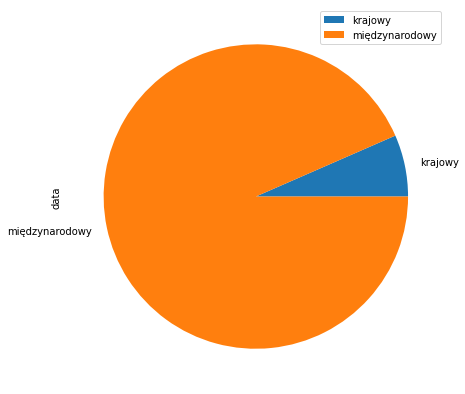

In [171]:
#wykres który pokazuje odsetek krajowych i międzynarodowych lotów w danych dot. popularności
plot = wykres.plot.pie(y='data', figsize=(7, 7))